In [1]:
import Pkg; Pkg.add(["Plots","Interact"]); ENV["GKS_WSTYPE"] = "png";

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Project.toml`
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Manifest.toml`


## Warmup: T&B Exercise 1.1

Let $B$ be a $4 \times 4$ matrix:

- Can/how would you represent each of these operations on $B$ as a matrix $C_i$?
- Which side would you multiply $C_i$ on?

1. double column 1
2. halve row 3
3. add row 3 to row 1
4. interchange columns 1 and 4
5. subtract row 2 from each of the other rows
6. replace column 4 by column 3
7. delete column 1

In [2]:
using LinearAlgebra

B = randn(4,4)

4×4 Matrix{Float64}:
  1.83422    0.480186  -1.22774   -0.0683888
 -0.114957   0.587698  -1.93622    0.605341
  0.497517   0.929934   0.534723  -1.32019
  1.89788   -2.3966     1.28466   -0.0730022

In [3]:
# C_i = ... ?

In [4]:
# C_i * B ?
# B * C_i ?

# Orthogonal Vectors and Matrices, Norms

1. Adjoint, inner product
2. Orthogonal vector, components of a vector
3. Unitary matrices, multiplication by a unitary matrix
4. Vector norms
5. Matrix norms induced by vector norms

## Adjoint, inner product

### Complex conjugate

The _complex conjugate_ of $z = \mathrm{Re}(z) + \mathrm{i}\ \mathrm{Im}(z) \in \mathbb{C}$ is $\bar{z} = \mathrm{Re}(z) - \mathrm{i}\ \mathrm{Im}(z)$.

**Properties:**

$$\bar{z} z = z \bar{z} = |z|^2 = |\mathrm{Re}(z)|^2  + |\mathrm{Im}(z)|^2 \in \mathbb{R}_{\geq 0}$$

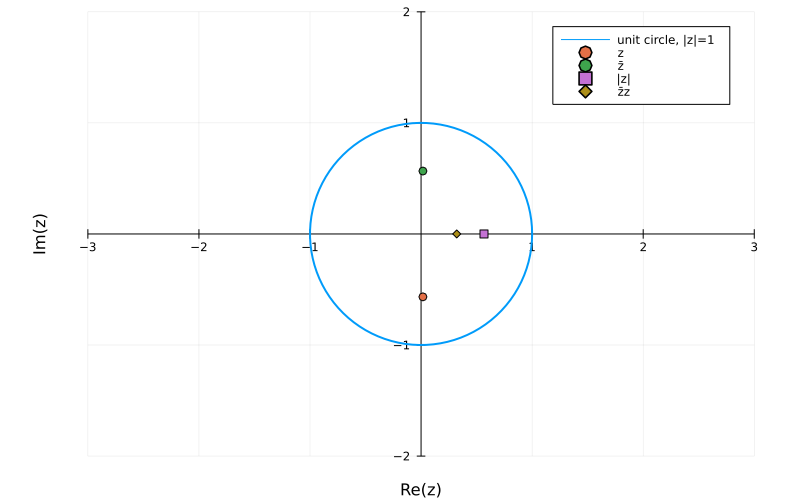

In [5]:
using Plots; gr(); default(label=nothing,size=(800,500),l=2)
theta = LinRange(0.,2π,100)
plt = plot(cos.(theta), sin.(theta), aspect_ratio=:equal, ylim=(-2,2), xlim=(-3,3),label="unit circle, |z|=1", xguide="Re(z)", yguide="Im(z)", framestyle=:origin)
z = randn(ComplexF64)
plot_point!(plt,s,l,m) = plot!(plt,[real(s)], [imag(s)], m=(4,m), l=nothing, label=l)
plot_point!(plt,z,"z",:o);plot_point!(plt,z',"z̄",:o);plot_point!(plt,abs(z),"|z|",:square);plot_point!(plt,z'*z,"z̄z",:d);
savefig("complex_conjugate.png")
display("image/png", read("complex_conjugate.png"))

### Hermitian conjugate AKA adjoint AKA hermitian transpose

The _hermitian conjugate_ or _adjoint_ $A^*$ of $A\in\mathbb{C}^{m\times n}$ is defined by

$$
(A^*)_{ij} = \overline{(A)_{ji}}.
$$

Example:

$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}
\end{bmatrix}
\Rightarrow
A^* = \begin{bmatrix} \bar a_{11} & \bar a_{21} & \bar a_{31} \\ \bar a_{12} & \bar a_{22} & \bar a_{32}
\end{bmatrix}
$$

### Compare: adjoint vs. transpose

$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}
\end{bmatrix}
\Rightarrow
A^* = \begin{bmatrix} \bar a_{11} & \bar a_{21} & \bar a_{31} \\ \bar a_{12} & \bar a_{22} & \bar a_{32}
\end{bmatrix}
$$

$$
A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}
\end{bmatrix}
\Rightarrow
A^T = \begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{12} & a_{22} & a_{32}
\end{bmatrix}
$$

- equivalent for real matrices
- adjoint has an alias, `A'`, transpose doesn't,
  because adjoint is usually what we want

In [6]:
A = rand(ComplexF64, 2,2)

2×2 Matrix{ComplexF64}:
 0.481891+0.183095im     0.647223+0.921544im
 0.320828+0.954978im  0.000524213+0.206845im

In [7]:
A' # alias adjoint(A)

2×2 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
 0.481891-0.183095im     0.320828-0.954978im
 0.647223-0.921544im  0.000524213-0.206845im

In [8]:
transpose(A)

2×2 transpose(::Matrix{ComplexF64}) with eltype ComplexF64:
 0.481891+0.183095im     0.320828+0.954978im
 0.647223+0.921544im  0.000524213+0.206845im

### Inner product

The _inner product_ of two column vectors, $x, y \in \mathbb{C}^m$ is the product of the adjoint of $x$ and $y$:

$$
x^* y = \sum_{i=1}^m \bar x_i y_i.
$$

- In other texts / settings: $(x,y)$, $\langle x, y \rangle$, $x \cdot y$

- $x$ column vector $\Rightarrow$
  $x^*$ row vector

In [9]:
m = 10;
x = rand(ComplexF64, m);
y = rand(ComplexF64, m);

In [10]:
x' * y

5.757861024853448 + 0.525052665144492im

In [11]:
y' * x

5.757861024853448 - 0.525052665144492im

In [12]:
sum(conj.(x) .* y)

5.757861024853448 + 0.5250526651444918im

In [13]:
dot(x,y)

5.757861024853448 + 0.525052665144492im

### Inner products define a geometry: norms and angles

Inner products define norms; this inner product defines the _Euclidean norm:_

$$\|x\| = \sqrt{x^* x} = \left(\sum_{i=1}^m |x_i|^2\right)^{1/2}.$$

Inner products define angles between vectors:

$$\cos \alpha_{xy} = \frac{x^* y}{\|x\|\|y\|}$$

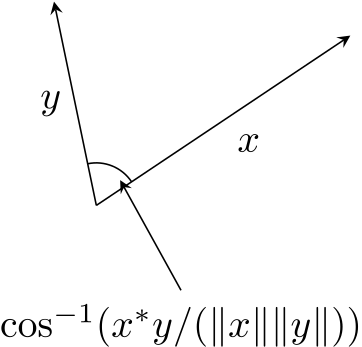

### "Bilinear"

$x^* y$ is linear in $y$, _conjugate linear_ in $x$ (_bilinear_ if $x,y\in\mathbb{R}^m$):

$$(x_1 + x_y)^* y = x_1^* y + x_2^* y$$
$$x^*(y_1 + y_2) = x^* y_1 + x^* y_2$$
$$(\alpha x)^* (\beta y) = \bar \alpha \beta x^* y$$

_conjugate linear_ is not linear for $\mathbb{C}$:

- Any linear map can be implemented by a matrix-vector product.  What matrix could do $z \mapsto \bar{z}$?

We say _sesquilinear_ ("one-and-a-half times linear") because it is a fun word.

### adjoint $\Rightarrow$ inner product? or inner product $\Rightarrow$ adjoint?

Suppose we had only defined the inner product of vectors and not the adjoint of a matrix.  We could have defined $A^*$ operationally: $A^*$ is the unique matrix such that

$$
x^* (A^* y) = (Ax)^* y, \quad \forall\ x\in\mathbb{C}^n, y\in\mathbb{C}^m.
$$

### Distributing adjoints and inverses

$$
\begin{aligned}
(AB)^* &= B^* A^* &(i) \\
(AB)^{-1} &= B^{-1} A^{-1} &(ii) \\
\end{aligned}
$$

Prove (i) using the previous slide.

### Commuting adjoints and inverse

$$
\begin{aligned}
(A^{-1})^* &= (A^*)^{-1} &(iii) \\
\end{aligned}
$$

Prove (iii) using (i).

In [14]:
A = rand(ComplexF64,2,2);
B = rand(ComplexF64,2,3);

In [15]:
(A * B)'

3×2 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
 0.0373329-0.931524im  -0.0444713-0.541685im
 -0.563592-1.52815im    -0.587895-0.883642im
  0.436562-1.64345im    -0.011612-1.03488im

In [16]:
B' * A'

3×2 Matrix{ComplexF64}:
 0.0373329-0.931524im  -0.0444713-0.541685im
 -0.563592-1.52815im    -0.587895-0.883642im
  0.436562-1.64345im    -0.011612-1.03488im

In [17]:
inv(A)'

2×2 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
 -0.455081-0.0833289im    1.02246+0.664391im
   1.00297+1.13717im    -0.919501-0.898217im

In [18]:
inv(A')

2×2 adjoint(::Matrix{ComplexF64}) with eltype ComplexF64:
 -0.455081-0.0833289im    1.02246+0.664391im
   1.00297+1.13717im    -0.919501-0.898217im

### Hermitian matrix

$A \in \mathbb{C}^{m\times m}$ is _hermitian_ if $A = A^*$.

**T&B Exercise 2.3:** Let $A = A^*$.  Prove:

(a) If $\lambda$ is an eigenvalue, $A x = \lambda x$, then $\lambda$ is real.

(b) If $Ax = \lambda_1 x$ and $Ay = \lambda_2 y$, $\lambda_1 \neq \lambda_2$, then $x^* y = 0$.

_Hint:_ use the operational definition of the adjoint, $(Ay)^* x = y^* (A^* x).$

## Orthogonal vectors, components of a vector

### Orthogonal vectors

$x$ and $y$ are _orthogonal_ if $x^* y = 0$.

By extension, sets of vectors $X$ and $Y$ are orthogonal _to each other_ if $x^*y = 0$ for all $x\in X$, $y\in Y$.

A set of nonzero vectors $S$ is _itself_ orthogonal if $x^* y = 0$, for all $x,y\in S$, $x \neq y$.

If additionally $\|x\| = 1$ for $x\in S$, then $S$ is _orthonormal_.

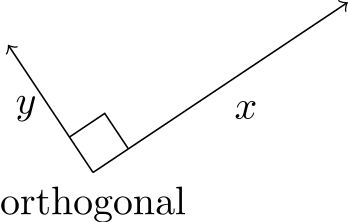

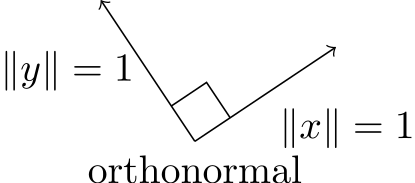

**T&B Theorem 2.1:** _The vectors in an orthogonal set $S$ are linearly independent_.

_Proof._

Suppose $\sum_{i=1}^n c_i v_i = 0.$ (Want to prove $c_i = 0$ for each $i$.)

Rewrite as $c_1 v_1 = - \sum_{i=2}^n c_i v_i$.

Multiply both sides by $(c_1 v_1)^*$:
$$
|c_1|^2 \|v_1\|^2 = (c_1 v_1)^* (c_1 v_1) = - \sum_{i=2}^n \bar c_1 c_i\  v_1^* v_i = 0.
$$

Therefore $c_1 = 0$.  Repeat for each $i$ to show each $c_i = 0$.

### Components of a vector

> The most important idea to draw from the concepts of inner products and orthogonality is this: inner products can be used to decompose arbitrary vectors into orthogonal components.

Suppose $\{q_1,q_2,\dots,q_n\}$ is an orthonormal set, let $v$ be an arbitrary vector.

$$
r = v - (q_1^* v) q_1 - (q_2^* v) q_2 - \dots - (q_n^* v) q_n
$$

**Lemma:** $r$ is orthogonal to $\{q_1,q_2,\dots,q_n\}$.

_Proof._

Pick $q_i$ and compute $q_i^* r$ (multiply both sides by $q_i^*$):

$$q_i^* r = q_i^*v - \sum_{j=1}^n (q_j^* v) (q_i^* q_j) = q_i^*v - (q_i^* v) (q_i^* q_i) = 0.$$

In [19]:
m = 150
n = 20
i = rand(1:n)        # random index for qᵢ
Q,_ = qr(rand(m, n)) # method for generating a random set of n orthogonal vectors
v = rand(m)          # arbitrary vector
r = copy(v)

for j in 1:n
    qⱼ = Q[:,j]
    r -= (qⱼ' * v) * qⱼ
end

qᵢ = Q[:,i]
qᵢ' * r

-3.1551314633332506e-16

(Computed `r` not _exactly_ orthogonal because of _rounding errors_, discussed more later).

### A full set of components

Suppose $v \in \mathbb{C}^m$ and $\{q_1, \dots, q_m\}$ is an orthonormal set.

(The orthonormal set spans $\mathbb{C}^m$, so we know there exist unique $\{\alpha_j\}_{j=1}^m$ such that
$v = \sum_j \alpha_j q_j.$)

We have decomposed $v$,
$$v = r + \sum_{j=1}^m (q_j^* v) q_j,$$
into $m+1$ orthogonal vectors $\{r, q_1, \dots, q_m\}$: if $r \neq 0$, this set would be orthogonal and we would have $m+1$ linearly independent vectors in $\mathbb{C}^m$.

So $r = 0$.
$$v = \sum_{j=1} (q_j^* v) q_j,$$
($\{(q_j^*v)\}_{j=1}^m$ is the set of expansion coefficients $\{\alpha_j\}$).

### Just coefficients for a different orthonormal basis

$$x = \underbrace{\sum_{j=1}^m x_j e_j}_{\text{expansion in canonical basis}} =
\underbrace{\sum_{j=1}^m (q_j^* x) q_j}_{\text{expansion in new basis}}$$

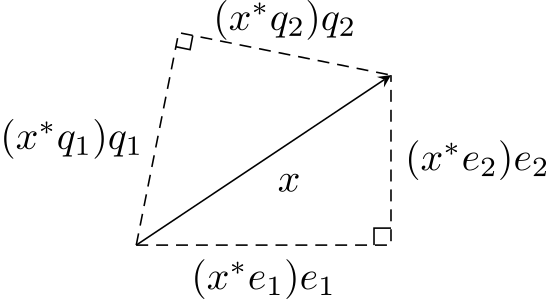

### Exercise (Pythagoras)

Show that if $x$ and $y$ are orthogonal, then

$$\|x + y\|^2 = \|x\|^2 + \|y\|^2.$$

**Corollary by induction:** if $\{x_i\}$ are orthogonal,

$$
\big\|\sum_{i=1}^n x_i\big\|^2 = \sum_{i=1}^n \|x_i\|^2.
$$

## Unitary matrices

$Q \in \mathbb{C}^{m \times m}$ is _unitary_ ($Q \in \mathbb{R}^{m \times m}$ is _orthogonal_) if
$$Q^* = Q^{-1}.$$

$$
\begin{bmatrix}
& & q_1^* & & \\ \hline
& & q_2^* & & \\ \hline
& & \vdots & & \\ \hline
& & q_m^* & & \end{bmatrix}
\left[
\begin{array}{c|c|c|c}
& & & \\
& & & \\
q_1 & q_2 & \dots & q_m \\
& & & \\
& & & \\
\end{array}
\right]
=
\begin{bmatrix}
1 & & & \\
& 1 & & \\
& & \ddots & \\
& & & 1 \end{bmatrix}
$$

$$ q_i^* q_j = \delta_{ij} \text{ (Kronecker delta) } := \begin{cases} 1, &i = j \\ 0, & i \neq j \end{cases}$$

$\{q_1, q_2, \dots, q_m\}$ are an orthormal basis for $\mathbb{C}^m$.

### Recall: $A^{-1} b$ expands $b$ in the $A$ column basis

So $Q^*b = Q^{-1} b$ expands $b$ in the (orthonormal) $Q$ column basis

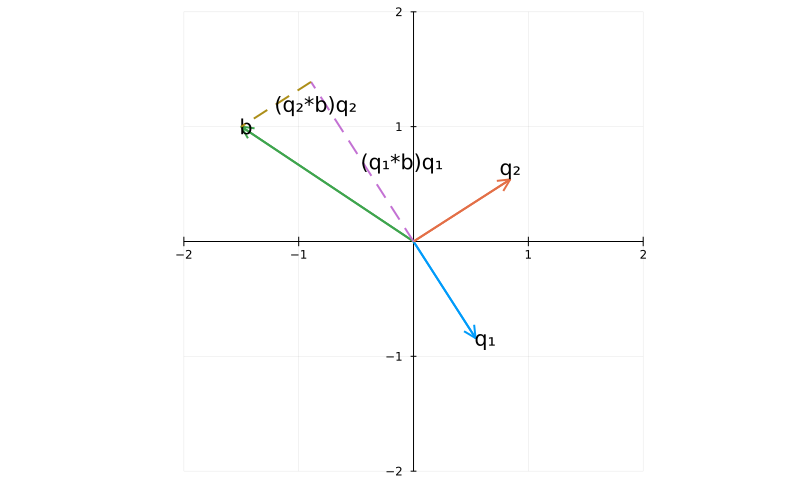

In [20]:
function plotQstarb(theta,b1, b2)
    Q = [[cos(theta);sin(theta)] [-sin(theta);cos(theta)]]
    b = [b1,b2]
    x = Q' * b
    a1 = Q[:,1]
    a2 = Q[:,2]

    rplot = plot([0,a1[1]],[0,a1[2]]
        ,aspect_ratio=:equal
        ,xlim=[(-2,2) (-2,2)]
        ,ylim=[(-2,2) (-2,2)]
        ,line=2
        ,arrow=1
        ,text=["",("q₁", :left)]
        ,framestyle=:origin
        )
    plot!(rplot, [0,a2[1]],[0,a2[2]],line=2,arrow=1,text=["",("q₂", :bottom)])
    plot!(rplot, [0,b[1]],[0,b[2]],arrow=1,text=["",("b", :left)])
    plot!(rplot,[0,1/2,1]*x[1]*a1[1],[0,1/2,1]*x[1]*a1[2],line=:dash,text=["",("(q₁*b)q₁", :left)])
    plot!(rplot,x[1]*a1[1].+[0,1/2,1]*x[2]*a2[1],x[1]*a1[2].+[0,1/2,1]*x[2]*a2[2],line=:dash,text=["",("(q₂*b)q₂", :left)])
    return rplot
end;
#theta=widget(-2π:0.1π:2π, value=-1.0, label="θ")
#b1=widget(-2.0:0.1:2.0, value=-1.5, label="b₁")
#b2=widget(-2.0:0.1:2.0, value=1.0, label="b₂")
#iplot = map(plotQstarb,theta,b1,b2)
#vbox(hbox(theta,b1,b2),iplot)
plotQstarb(-1.0,-1.5,1.0)
savefig("q_basis.png")
display("image/png", read("q_basis.png"))

### Multiplication by a unitary $Q$ preserves Euclidean geometry (norms and angles)

**Prove:**

$$ (Qx)^* (Qy) = x^* y $$

**Corollaries:**

$$\|Qx\| = ((Qx)^* (Qx))^{1/2} = (x^* x)^{1/2} = \|x\|$$

$$\cos\alpha_{Qx,Qy} = \frac{(Qx)^* (Qy)}{\|Qx\|\|Qy\|} = \frac{x^* y}{\|x\| \|y\|} = \cos\alpha_{x,y}$$

### T&B Exercise 2.1

Show that if a matrix $A$ is both triangular and unitary, then it is diagonal.

_Hint:_ the homework problem about triangular matrices.

### T&B Exercise 2.4

What can be said about the eigenvalues of a unitary matrix?

## Vector norms

The Euclidean norm $\|x\| = \big(\sum_{i=1}^m |x_i|^2\big)^{1/2}$ is just _one_ norm.

### Norm identities

$\|\cdot \|: \mathbb{C}^m \to \mathbb{R}$ is a _norm_ if

1. $\|x\| \geq 0$, and $\|x\| = 0 \Leftrightarrow x = 0$.
2. $\|x + y\| \leq \|x\| + \|y\|$ (triangle inequality)
3. $\|\alpha x\| = |\alpha| \|x\|$

### $p$-norms

$$\| x \|_p = \left(\sum_{i=1}^m |x_i|^p\right)^{1/p}, \quad 1 \leq p < \infty.$$

$$\| x \|_\infty = \max_{1\leq i \leq m} |x_i|.$$

(The Euclidean norm is $\|\cdot \|_2$.)

(Challenge exercise: prove the norm identities for $\|\cdot\|_p$.)

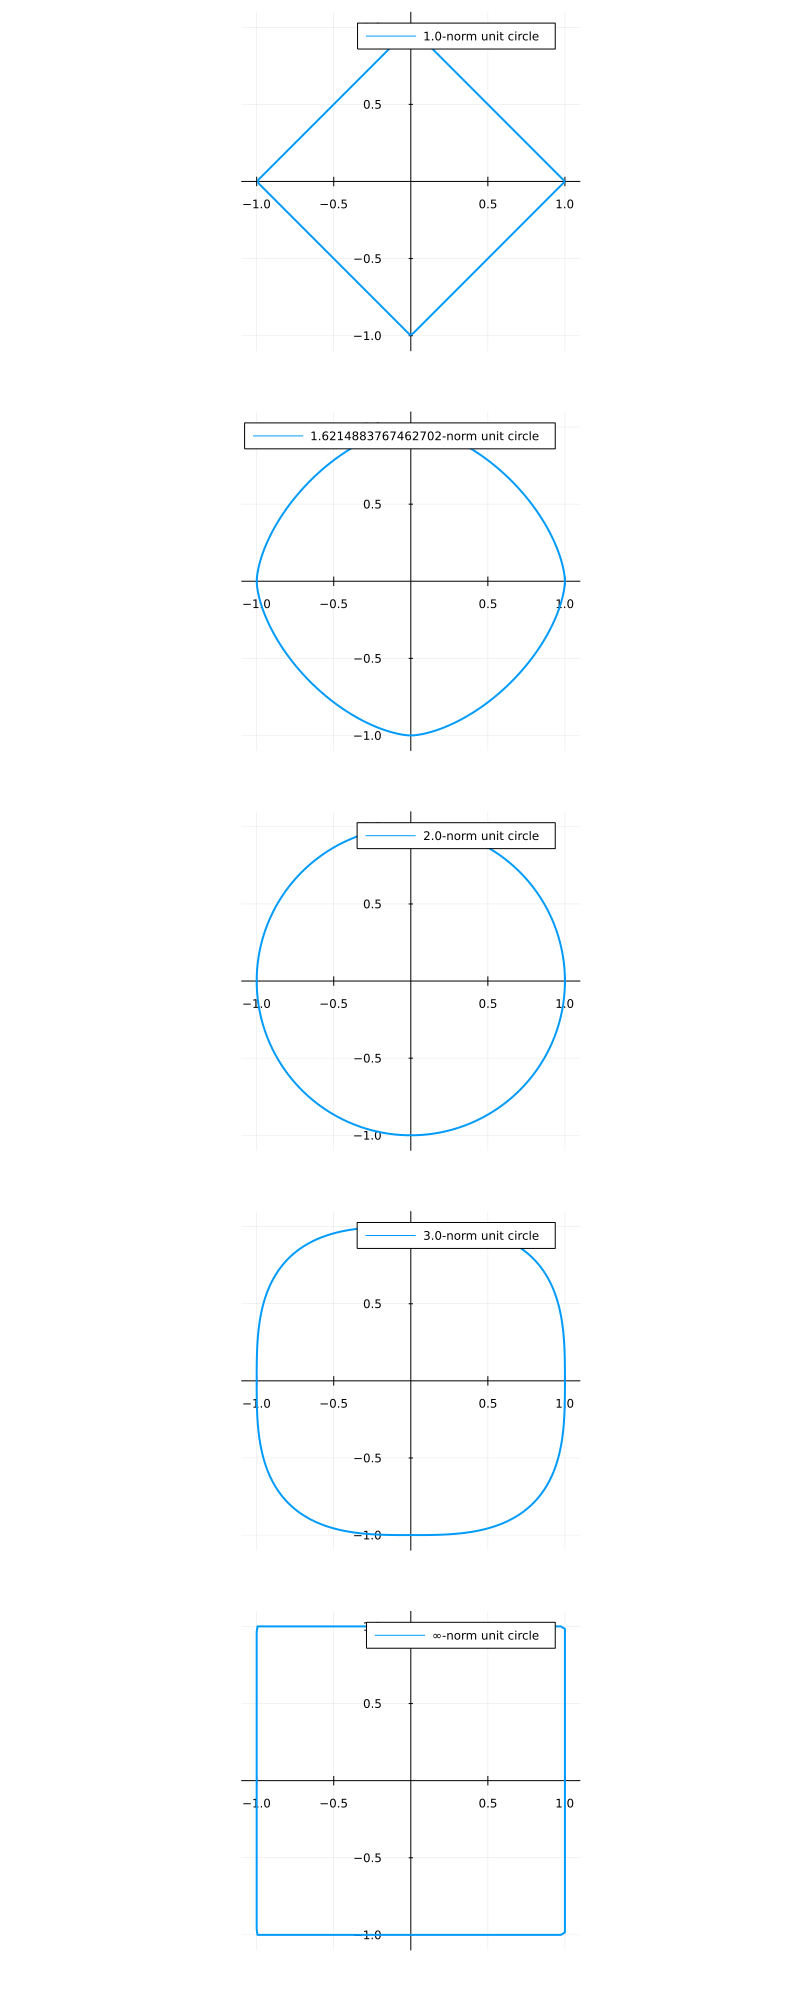

In [21]:
function plot_unit_norm(emp)
    theta = LinRange(0.,2π,300)
    x = cos.(theta)
    y = sin.(theta)
    norm = copy(x)
    p = nothing
    if emp == 0.
        norm = max.(abs.(x),abs.(y))
        p = "∞"
    else
        p = -log2(-emp)
        norm = (abs.(x).^p + abs.(y).^p).^(1 / p)
    end
    x ./= norm
    y ./= norm
    plt = plot(x,y,label="$(p)-norm unit circle",aspect_ratio=:equal,xlim=(-1.1,1.1),ylim=(-1.1,1.1),framestyle=:origin)
    return plt
end
#emp=widget(-0.5:0.05*0.5:0., value=-0.25, label="p", readout = false)
#iplot = map(plot_unit_norm,emp)
#vbox(hbox(emp),iplot)
plot(plot_unit_norm(-.5),plot_unit_norm(-.325),plot_unit_norm(-.25),plot_unit_norm(-0.125),plot_unit_norm(0.),size=(800,2000),layout=(5,1))
savefig("norm_disks.png")
display("image/png", read("norm_disks.png"))

### There are many norms

Any open compact set that is symmetric about the origin and defines a norm.

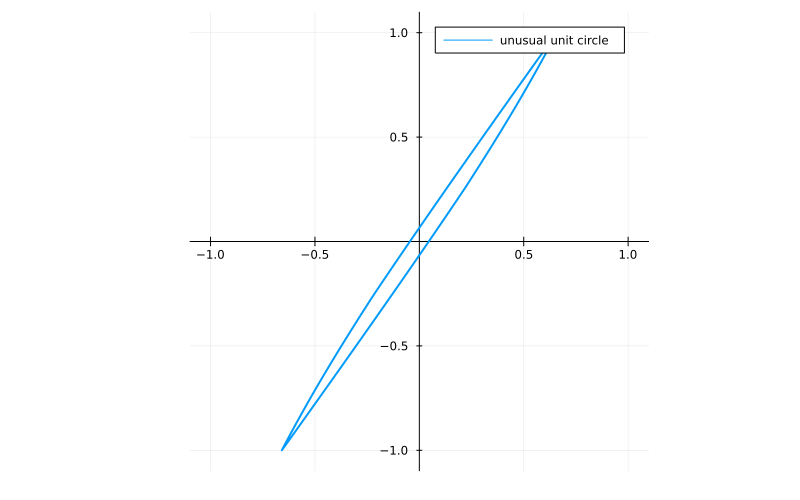

In [22]:
theta = LinRange(0,2π,300)
xhat = cos.(theta)
yhat = sin.(theta)
norm = (abs.(xhat) + 1/3 .* abs.(yhat)) + (1/3* abs.(xhat).^2 + abs.(yhat).^2).^(1/2)
xhat ./= norm
yhat ./= norm
xyhat = [xhat'; yhat']
A = randn(2,2) + I
xy = A * xyhat
xy ./= maximum(abs.(xy))
plot(xy[1,:],xy[2,:],label="unusual unit circle",aspect_ratio=:equal,xlim=(-1.1,1.1),ylim=(-1.1,1.1),framestyle=:origin)
savefig("odd_norm.png")
display("image/png", read("odd_norm.png"))

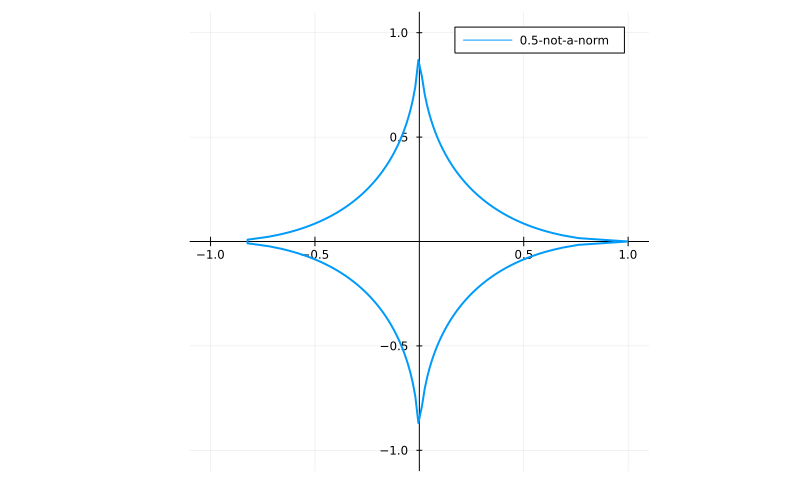

In [23]:
theta = LinRange(0,2π,300)
x = cos.(theta)
y = sin.(theta)
p = 0.5
norm = (abs.(x).^p + abs.(y).^p).^(1/p)
x ./= norm
y ./= norm
plot(x,y,label="$(p)-not-a-norm",aspect_ratio=:equal,xlim=(-1.1,1.1),ylim=(-1.1,1.1),framestyle=:origin)
savefig("not_a_norm.png")
display("image/png", read("not_a_norm.png"))

$\|\cdot\|_p$ for $p < 1$ does not define a norm.

### T&B Exercise 3.1

Prove that if $W$ is a full-rank matrix and $\|\cdot\|$ is a norm, then
$$\| v \|_W = \| W v \|$$
is a norm.

Which norm identities are violated if $W$ is not full-rank?

## Matrix Norms Induced by Vector Norms

### Matrices are vectors

$$ \mathbb{C}^{m \times n} \cong \mathbb{C}^{mn} $$

So any norm on $\mathbb{C}^{mn}$ is a norm on $\mathbb{C}^{m \times n}$

But the intuitive idea that big matrices make vectors bigger and small matrices make vectors smaller is
the motivation for _induced matrix norms_.

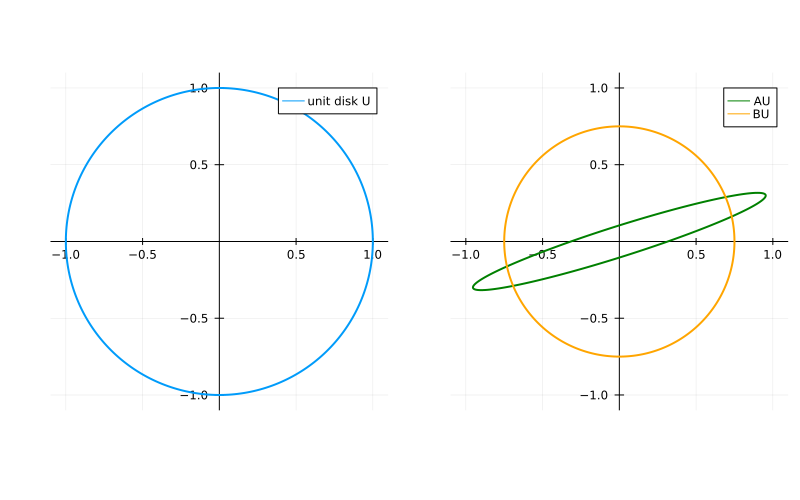

In [24]:
s1 = [1., 0.1]; s2 = [0.75, 0.75];

Q1,_ = qr(rand(2,2)); Q2,_ = qr(rand(2,2));

A = Q1 * diagm(s1) * Q1'; B = Q2 * diagm(s2) * Q2';

θ = LinRange(0,2π,300);

U = [cos.(θ)'; sin.(θ)'];
AU = A*U;
BU = B*U;

lplot = plot(U[1,:], U[2,:], lim=(-1.1,1.1), aspect_ratio=:equal, framestyle=:origin, label="unit disk U")
rplot = plot(AU[1,:], AU[2,:], lim=(-1.1,1.1), c=:green, aspect_ratio=:equal, framestyle=:origin, label="AU")
plot!(rplot, BU[1,:], BU[2,:], c=:orange, label="BU")
plot(lplot,rplot,layout=(1,2))
savefig("A_vs_B.png")
display("image/png", read("A_vs_B.png"))

$\|\mathrm{vec}(A)\|_2 \approx 1.005$, $\|\mathrm{vec}(B)\|_2 \approx 1.06$, but $A$ makes some vectors larger than $B$ can.

### Induced matrix norms

Given vector norms $\|\cdot\|_{(n)}$ and $\|\cdot\|_{(m)}$ on the domain and range of $A \in \mathbb{C}^{m \times n}$, the induced matrix norm $\|A\|_{(m,n)}$ is:

- The smallest number $C$ such that
  $$\|A x\|_{(m)} \leq C \|x\|_{(n)}, \quad \forall x \in \mathbb{C}^n.$$
  
- The biggest image of a unit disk vector,
  $$\sup_{\|x\|_{(n)} = 1} \|A x \|_{(m)}.$$
  
If $\|\cdot\|_{(m)}$ and $\|\cdot \|_{(n)}$ are both the same $p$-norm, then we will also use $\|\cdot\|_p$
for the induced matrix norm.

### T&B Example 3.1

$$A = \begin{bmatrix} 1 & 2 \\ 0 & 2
\end{bmatrix}$$

- $\|A\|_p$ is not monotonic in $p$
- the vector $x_p$ that maximizes $\|Ax\|_p$ changes

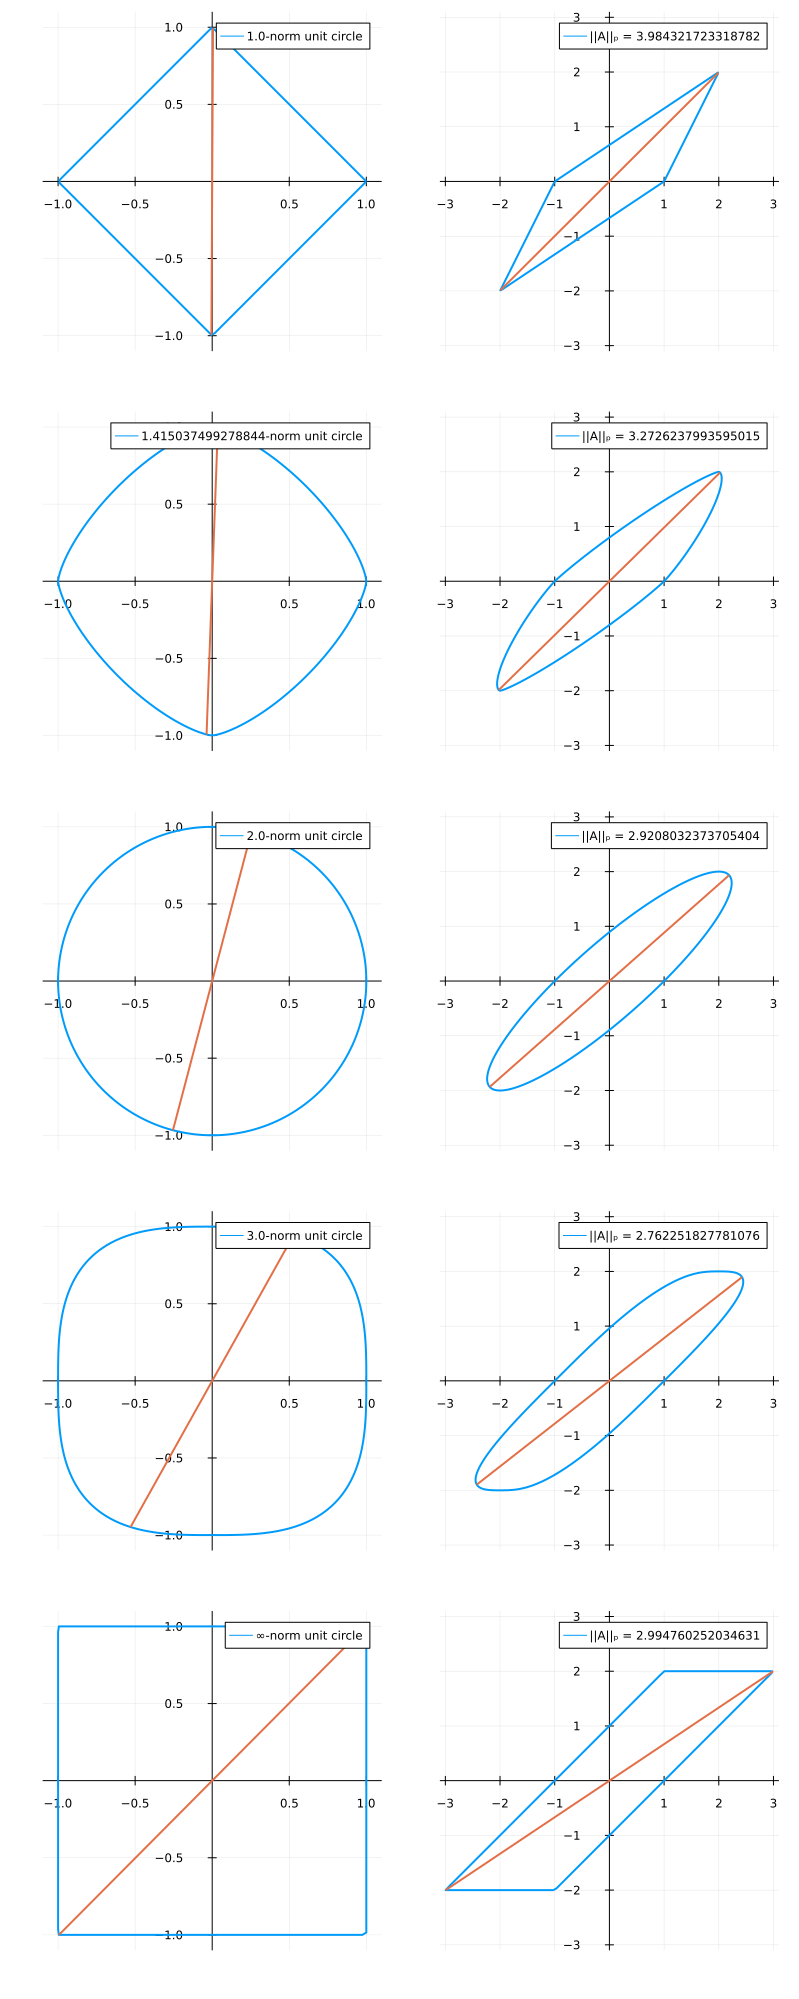

In [25]:
function plot_unit_norm_image_A(emp,A)

    theta = LinRange(0.,2π,300)
    x = cos.(theta)
    y = sin.(theta)
    norm = copy(x)
    p = nothing
    if emp == 0.
        norm = max.(abs.(x),abs.(y))
        p = "∞"
    else
        p = -log2(-emp)
        norm = (abs.(x).^p + abs.(y).^p).^(1 / p)
    end
    x ./= norm
    y ./= norm
    xy = [x y]'
    Axy = A*xy;
    Ax = Axy[1,:]
    Ay = Axy[2,:]
    img_norm = copy(Ax)
    if emp == 0.
        img_norm = max.(abs.(Ax),abs.(Ay))
    else
        img_norm = (abs.(Ax).^p + abs.(Ay).^p).^(1 / p)
    end
    i = minimum(findall(img_norm .== maximum(img_norm)))
    plt = plot(Ax,Ay,label="||A||ₚ = $(img_norm[i])",aspect_ratio=:equal,lim=(-3.1,3.1),framestyle=:origin)
    plot!(plt, [-Ax[i], Ax[i]], [-Ay[i], Ay[i]])
    pltl = plot_unit_norm(emp)
    plot!(pltl, [-x[i], x[i]], [-y[i], y[i]])
    return plot(pltl,plt,layout=(1,2))
end
function plot_unit_norm_image(emp)
    A = [1 2; 0 2]
    return plot_unit_norm_image_A(emp,A)
end
#emp=widget(-0.5:0.05*0.5:0., value=-0.25, label="p", readout = false)
#iplot = map(plot_unit_norm_image,emp)
#vbox(hbox(emp),iplot)
plot(
    plot_unit_norm_image(-.5),
    plot_unit_norm_image(-.375),
    plot_unit_norm_image(-.25),
    plot_unit_norm_image(-.125),
    plot_unit_norm_image(0),
    size=(800,2000),
    layout=(5,1)
    )
savefig("norm_vec.png")
display("image/png", read("norm_vec.png"))

### T&B Example 3.2: the $p$-norm of a diagonal matrix $D$

$$\|D\|_p = \max_{1\leq i \leq m} |d_i|$$

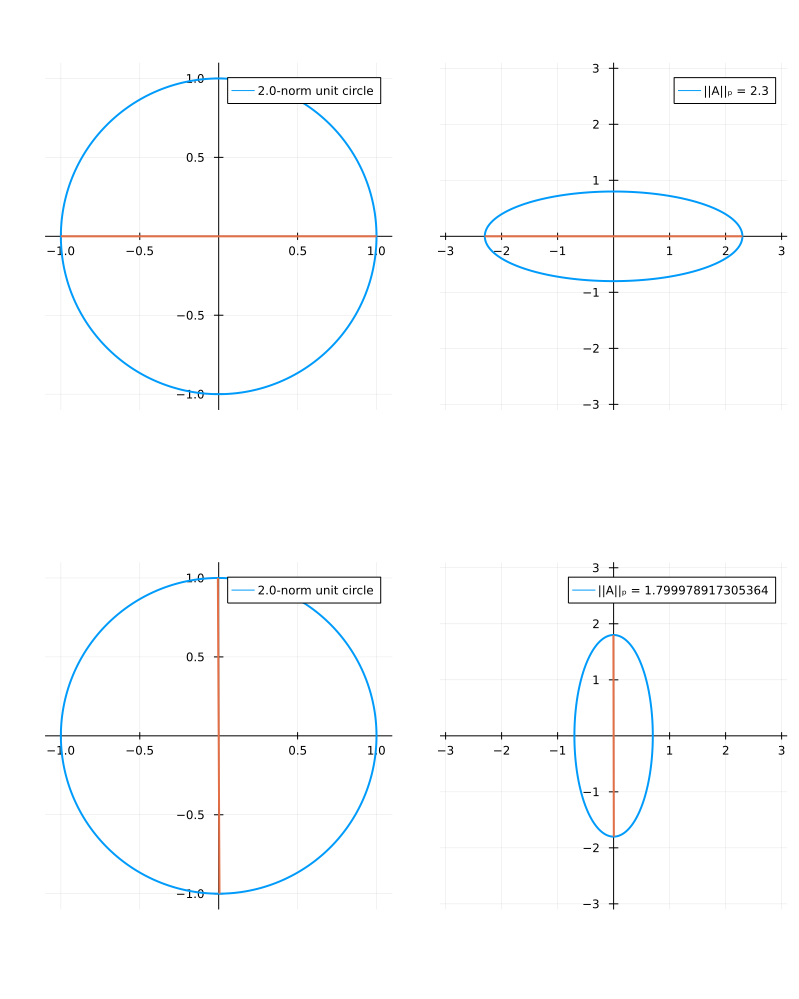

In [26]:
function plot_unit_norm_image_diagm(emp,d1,d2)
    D = diagm([d1,d2])
    return plot_unit_norm_image_A(emp,D)
end
#emp=widget(-0.5:0.05*0.5:0., value=-0.25, label="p", readout = false)
#d1=widget(-2.0:0.1:2.0, value=-1.5, label="d₁")
#d2=widget(-2.0:0.1:2.0, value=1.0, label="d₂")
#iplot = map(plot_unit_norm_image_diagm,emp,d1,d2)
#vbox(hbox(emp,d1,d2),iplot)
plot(
    plot_unit_norm_image_diagm(-.25,-2.3,0.8),
    plot_unit_norm_image_diagm(-.25,0.7,1.8),
    size=(800,1000),
    layout=(2,1)
    )
savefig("diag_disk.png")
display("image/png", read("diag_disk.png"))

### T&B Example 3.3: the 1-norm of a matrix

Write $A$ by its columns,
$$
A=
\left[
\begin{array}{c|c|c}
& & \\
a_1 & \dots & a_n \\
& & \\
\end{array}
\right].
$$

Write out $\|Ax\|_1$ and apply the triangle inequality and norm scaling, 

$$\|Ax\|_1 = \big\| \sum_{j=1}^n x_j a_j \big\|_1 \leq \sum_{j=1}^n \| x_j a_j \|_1= \sum_{j=1}^n |x_j| \| a_j \|_1.$$

$$\|Ax\|_1 \leq \sum_{j=1}^n |x_j| \| a_j \|_1.$$

**Lemma:** $\sum_{j=1}^n |f_j g_j| \leq (\max_{1\leq j \leq n} |f_j|) \sum_{j=1}^n |g_j|.$

So,

$$\sum_{j=1}^n |x_j| \| a_j \|_1 \leq (\max_{1\leq j \leq n} \| a_j \|_1) \sum_{j=1}^n |x_j| =
(\max_{1\leq j \leq n} \| a_j \|_1) \|x\|_1.$$

Therefore,
$$
\|A\|_1 = \max_{\|x\| = 1} \|Ax\|_1 \leq \max_{1\leq j \leq n} \| a_j \|_1.
$$

$$
\|A\|_1 \leq \max_{1\leq j \leq n} \| a_j \|_1.
$$

This is in fact an equality, because we can find $x$ that achieves the bound: choosing $x = e_k$ where $k = \arg\max_{1 \leq j \leq n} \|a_j\|_1$,

$$
\|Ax\|_1 = \| a_k \|_1 = \max_{1\leq j \leq n} \| a_j \|_1 = \max_{1\leq j \leq n} \| a_j \|_1.
$$

So
$$
\|A\|_1 = \max_{1\leq j \leq n} \| a_j \|_1.
$$

### T&B Example 3.4: the $\infty$-norm of a matrix

$$\|Ax\|_{\infty} = \max_{1\leq i \leq m} |(Ax)_i| =
\max_{e_i \in \{e_1,\dots,e_m\}} |e_i^* (Ax)|.$$

If $I \subset J$, then

$$\max_{y\in I} f(y) \leq \max_{y\in J} f(y).$$

We let $I = \{e_1, \dots, e_m\}$ and
$J = \{y: \|y\|_1 = 1\}$, so

$$\max_{e_i \in \{e_1,\dots,e_m\}} |e_i^* (Ax)| \leq \max_{\|y\|_1 = 1} |y^*(Ax)| = \max_{\|y\|_1 = 1}
|(A^*y)^* x| = \max_{\|y\|_1 = 1}
|x^* (A^*y)|.$$

$$\|Ax\|_\infty \leq \max_{\|y\|_1 = 1} |x^* (A^*y)|.$$

We apply the triangle inequality,

$$\max_{\|y\|_1 = 1} |x^* (A^*y)| = \max_{\|y\|_1 = 1} \big|\sum_{j=1}^n \bar x_j (A^*y)_j \big|
\leq \max_{\|y\|_1 = 1} \sum_{j=1}^n |\bar x_j (A^*y)_j|.$$

Now we use the same lemma as above!

$$\max_{\|y\|_1 = 1} \sum_{j=1}^n |\bar x_j (A^*y)_j| \leq \max_{\|y\|_1 = 1} (\max_{1 \leq j \leq n} |x_j|)
\sum_{j=1}^n |(A^*y)_j| = \max_{\|y\|_1 = 1} \|x\|_\infty \|A^* y\|_1 = \|x\|_\infty \|A^*\|_1.$$

So $\|A\|_\infty = \sup_{\|x\|_\infty = 1} \| A x\|_\infty \leq \|A^*\|_1.$
The bound is in fact an equality, $\|A\|_\infty = \|A^*\|_1.$

The above proof demonstrates the _duality_ between $\|\cdot\|_1$ and $\|\cdot\|_\infty$: they complement each other.

Next lecture will extend this notion of duality to other values of $p$.

### T&B Exercise 3.2

Let $\|\cdot\|$ denote any norm on $\mathbb{C}^m$ and also the induced matrix norm on $\mathbb{C}^{m \times m}$.  Show that $\rho(A) \leq \|A\|$, where $\rho(A)$ is the _spectral radius_ of $A$, i.e., the largest absolute value $|\lambda|$ of an eigenvalue $\lambda$ of $A$.